# Numerische Integration

## Übungsblatt

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import scipy


def trapz(func, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = func(x)
    return 0.5 * h * (y[0] + 2 * np.sum(y[1:-1]) + y[-1])


def trapz_data(x, y):
    return 0.5 * np.sum((x[1:] - x[:-1]) * (y[1:] + y[:-1]))


### Aufgabe 1

Die Funktion 

$$ f(x) = \cos\left( 2 \pi x (1 + x) \right) $$

deren Ableitung wir bereits mal numerisch berechnet haben soll nun integriert werden:

$$ S = \int_{-1}^1 f(x) \, dx $$

1. Berechne $S$ mit [Wolfram|Alpha](https://www.wolframalpha.com).
2. Berechne $S$ mit der passenden Funktion aus `scipy.integrate`.
3. Berechne $S$ mit der passenden Variante der Trapezregel für unterschiedliche Anzahl Intervalle $n$. Bestimme $n$, so dass der absolute Fehler verglichen mit dem Resultat von `scipy.integrate` kleiner als $10^{-10}$ ist.

In [35]:
# 1. Wolfram|Alpha


In [36]:
# 2. SciPy
import numpy as np
from scipy.integrate import quad


def f(x):
    return np.cos(2 * np.pi * x * (1 + x))


S, _ = quad(f, -1, 1)
print(S,_)


0.467286073178865 6.878597129946989e-13


In [37]:
# 3. Trapezregel
trapz(f, -1,1,1000)

0.46728607319992194

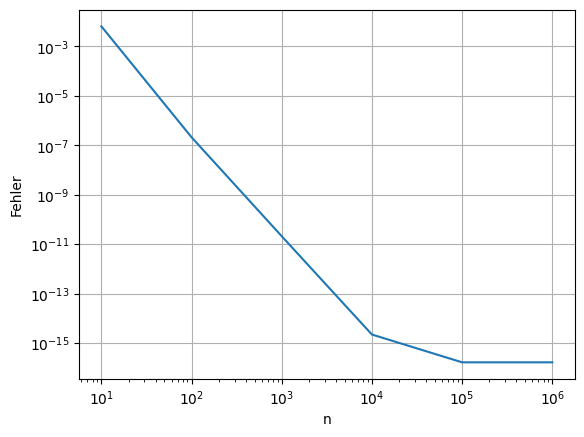

In [38]:
ns = np.logspace(1,6,6, dtype=int)
s3s = np.array([trapz(f,-1,1,n)for n in ns])
s3_errors = np.abs(s3s-S)

plt.loglog(ns,s3_errors,"-")
plt.xlabel("n")
plt.ylabel("Fehler")
plt.grid()

Also muss $n\approx 10^{3}$ gewählt werden.

### Aufgabe 2: Wasserverbrauch

#### a) Daten einlesen, darstellen, verstehen

1. Lies die Daten in `Wasserverbrauch.csv` ein.
2. Stelle den Wasserverbrauch in Abhängigkeit der Zeit dar.
3. Schreibe die Achsen mit den korrekten Variablen und deren Einheiten an.
4. Bestimme die Einheit des Integrals über den Wasserverbrauch. Also was ist die Bedeutung der Fläche unter dieser Kurve?

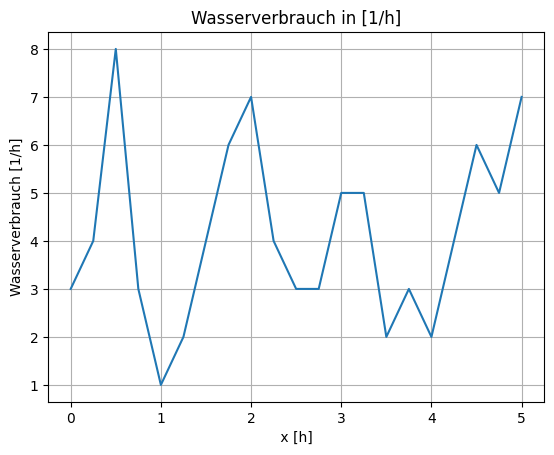

In [95]:
wasserverbrauch =  np.loadtxt("Wasserverbrauch.csv", delimiter=";", skiprows=1)
x, y  = wasserverbrauch.T

plt.plot(x,y)
plt.xlabel(" x [h] ")
plt.ylabel("Wasserverbrauch [1/h]")
plt.title("Wasserverbrauch in [1/h]")
plt.grid()

Das Integral über den Verbrauch (in l/h) ist die Wassermenge in Litern, die im integrierten Zeitraum verbraucht wurde.

#### b) Daten integrieren

Bestimme den Wasserverbrauch von $t=2$ bis und mit $t=5$.

Benutze dazu einmal passende Trapezregel-Funktion (zuoberst bereits definiert) und einmal [`scipy.integrate`](https://docs.scipy.org/doc/scipy/tutorial/integrate.html).

In [115]:
%timeit x.searchsorted(2)

654 ns ± 49.2 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [114]:
%timeit x[x>=2] 

2.02 µs ± 161 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [116]:
scipy.integrate.trapezoid(y[8:],x[8:])

12.25

In [117]:
trapz_data(x[8:],y[8:])

12.25

#### c) Integrierten Bereich darstellen (optional)

Stelle die Fläche unter dem Graphen zwischen $t=2$ und $t=5$ mithilfe von [`plt.fill_between`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html) dar.

Text(0, 0.5, 'Wasserverbrauch [l/h]')

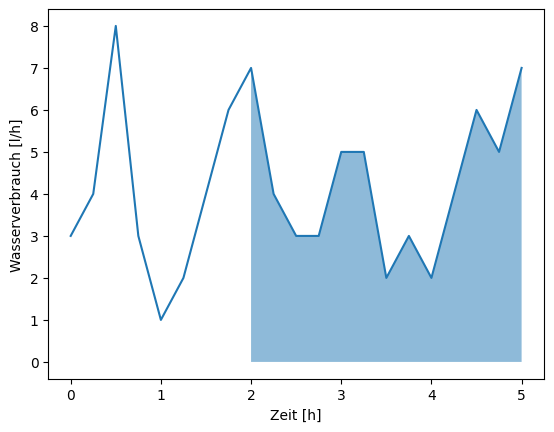

In [118]:
plt.plot(x,y)
plt.fill_between(x[8:], y[8:], alpha=0.5)
plt.xlabel("Zeit [h]")
plt.ylabel("Wasserverbrauch [l/h]")

### Aufgabe 3: Temperaturen in Davos

Hier werden wir Daten zuerst interpolieren, um die Nullstellen bestimmen zu können. Dann wird zwischen den Nullstellen integriert.

#### a) Daten einlesen, darstellen, verstehen

- Lies die Daten in `TemperaturWeihnachten.csv` ein. Diese enthalten den Temperaturverlauf vom 24. und 25. Dezember in Davos.
- Stelle die Temperatur in Abhängigkeit der Zeit dar mit den korrekten Achsenbeschriftungen inklusive Einheiten.

#### b) Interpolation

- Interpoliere die Daten im Bereich $t \in [1,47]$ an 500 Punkten.
- Stelle die Interpolationsfunktion grafisch dar.

Tipp: Folgende Funktionen kannst du für diese Aufgabe benutzen:

- [`np.linspace`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)
- [`scipy.interpolate`](https://docs.scipy.org/doc/scipy/reference/interpolate.html)


#### c) Nullstellen bestimmen

Im Diagramm von b) ist ersichtlich, dass die Temperatur an 3 Stellen durch 0 geht.

- Finde alle drei Nullstellen.
- Stelle sie im Diagramm als rote Punkte dar.

Tipp: Folgende Funktionen kannst du für diese Aufgabe benutzen:

- [`scipy.optimize.bisect`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.bisect.html)
- [`scipy.optimize.newton`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html#scipy.optimize.newton)


#### c) Mittlere Temperatur bestimmen

Berechnen wir die durchschnittliche Temperatur zwischen der 1. und 3. Nullstelle.

Der Mittelwert einer Funktion $f(x)$ zwischen $a$ und $b$ ist definiert als

$$ \frac{1}{b-a} \int_a^b f(x) \, dx $$

- Schreibe eine Funktion `mean_func(func, a, b)`, welche die den Mittelwert einer Funktion `func` zwischen zwei werten `a` und `b` mithilfe von SciPy berechnet.
- Benutze diese, um die mittlere Temperatur zwischen der zweiten und dritten Nullstelle zu berechnen.


#### d) Darstellung

- Stelle das Integral in dem Diagramm aus der Aufgabe c) mithilfe von [`plt.fill_between`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html) dar.
- Plotte dazu den Mittelwert zwischen der 1. und 3. Nullstelle als konstante Funktion.